# 비지도 학습 군집화

# K-means

- 군집화에서 가장 일반적인 알고리즘
- `군집 중심(centroid)`라는 임의의 지점을 선택해서 해당 중심에 가장 가까운 포인트들을 선택하는 군집화
- 일반적인 군집화에서 가장 많이 사용되는 기법
- 거리 기반 알고리즘으로 속성의 개수가 매우 많을 경우 군집화의 정확도가 떨어짐

# iris 데이터 군집화

In [21]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

iris = load_iris()

In [22]:
# feature 명에 포함되어있는 (cm) 자르기
cols = [each[:-5] for each in iris.feature_names]
cols

['sepal length', 'sepal width', 'petal length', 'petal width']

In [23]:
iris_df = pd.DataFrame(data=iris.data, columns=cols)
iris_df.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [24]:
feature = iris_df[['petal length', 'petal width']]
feature.head()

,petal length,petal width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


## KMeans
- `n_clusters` : 군지화할 개수, 즉 군집 중심점의 개수
- `init`: 초기 군집 중심점의 좌표를 설정하는 방식을 결정
- `max_iter`: 최대 반복 횟수, 모든 데이터의 중심점 이동이 없으면 종료

In [25]:
model = KMeans(n_clusters=3) 
model.fit(feature)

/usr/local/anaconda3/envs/ds_study/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

- 3개 그룹으로 클러스터링

In [26]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

## 군집 중심값

In [27]:
model.cluster_centers_

array([[5.59583333, 2.0375    ],
       [1.462     , 0.246     ],
       [4.26923077, 1.34230769]])

## 클러스터링 결과 시각화

In [28]:
predict = pd.DataFrame(model.predict(feature), columns=['cluster'])
feature = pd.concat([feature, predict], axis=1)
feature.head()

,petal length,petal width,cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1


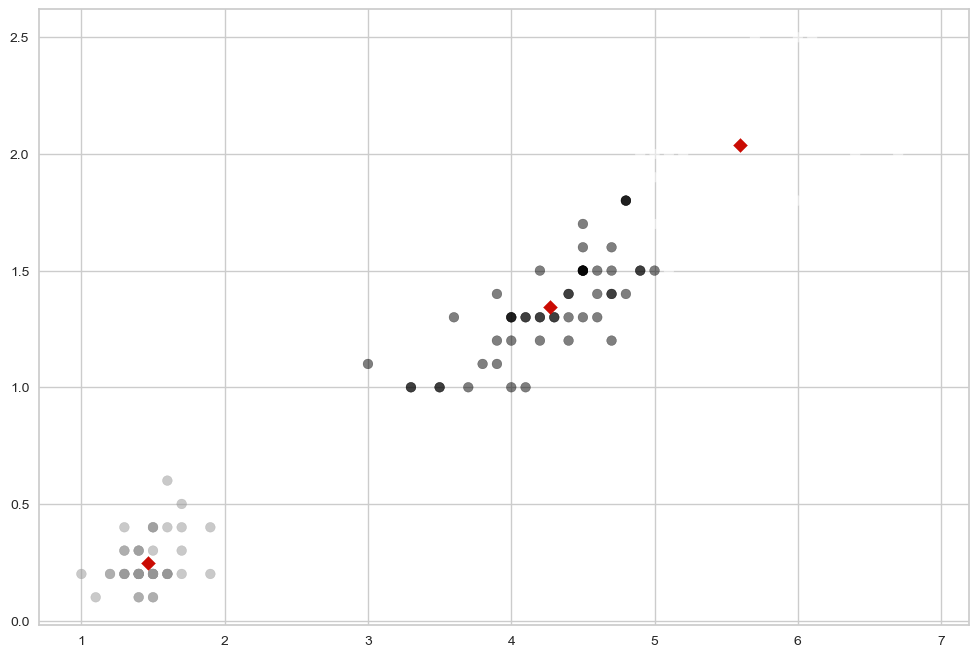

In [29]:
centers = pd.DataFrame(model.cluster_centers_, columns=['petal length', 'petal width'])
center_x= centers['petal length']
center_y = centers['petal width']

plt.figure(figsize=(12, 8))
plt.scatter(feature['petal length'], feature['petal width'], c=feature['cluster'], alpha=0.5)
plt.scatter(center_x, center_y, s=50, marker='D', c='r')

plt.show()

# 군집 평가 - 실루엣 분석

- classifier는 평가 기준(정답, label)을 가지고 있지만, 군집은 그렇지 않음
- 군집 결과를 평가하기 위해 `실루엣 분석`을 많이 활용함
    - 각 군집 간의 거리가 얼마나 효율적으로 분리되어 있는지 나타냄
    - 다른 군집과는 거리가 떨어져 있고 동일 군집간의 데이터는 서로 가깝게 잘 뭉쳐 있는지 확인
    - 군집화가 잘 되어 있을수록 개별 군집은 비슷한 정도의 여유공간을 가지고 있음
    - 실루엣 계수: 개별 데이터가 가지는 군집화 지표 

In [31]:
kmeans = KMeans(n_clusters=3).fit(iris_df)

/usr/local/anaconda3/envs/ds_study/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [32]:
iris_df['cluster'] = kmeans.labels_
iris_df.head()

,sepal length,sepal width,petal length,petal width,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [33]:
from sklearn.metrics import silhouette_samples, silhouette_score

avg_value = silhouette_score(iris.data, iris_df['cluster'])
score_values = silhouette_samples(iris.data, iris_df['cluster'])

print('avg_value', avg_value)
print('silhouette_samples() return 값의 shape', score_values.shape)

avg_value 0.5528190123564095
silhouette_samples() return 값의 shape (150,)


In [17]:
# !pip install yellowbrick

/usr/local/anaconda3/envs/ds_study/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/anaconda3/envs/ds_study/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


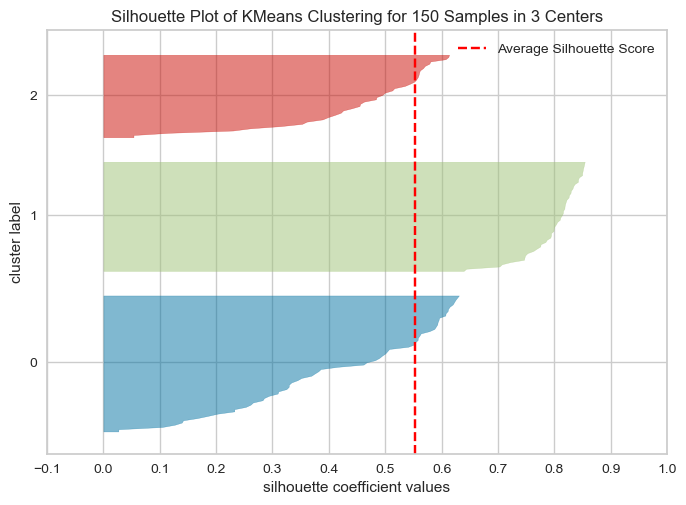

SilhouetteVisualizer(ax=<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 150 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick', estimator=KMeans(n_clusters=3))

In [34]:
from yellowbrick.cluster import silhouette_visualizer
silhouette_visualizer(kmeans, iris.data, colors='yellowbrick')